In [1]:
import os
import pandas as pd
import numpy as np

data_path = '/run/media/mh1644/My work/machine learning/deep_learning/computer_vision/livenes_detection/data/code/file2.csv'
hand_pose  = pd.read_csv(data_path)

In [2]:
hand_pose.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,target
0,55,103,131,159,177,62,100,133,153,50,...,63,76,37,46,63,86,51,47,50,0
1,54,104,133,165,182,66,103,135,157,52,...,73,78,43,50,66,84,49,44,48,0
2,55,105,136,168,183,63,103,136,157,50,...,72,77,41,50,66,83,48,43,45,0
3,56,104,134,165,181,66,103,134,154,53,...,73,78,42,51,67,82,47,42,45,0
4,52,102,133,164,180,66,102,133,154,54,...,73,76,42,52,68,80,46,42,46,0


In [3]:
hand_pose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15780 entries, 0 to 15779
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       15780 non-null  int64
 1   1       15780 non-null  int64
 2   2       15780 non-null  int64
 3   3       15780 non-null  int64
 4   4       15780 non-null  int64
 5   5       15780 non-null  int64
 6   6       15780 non-null  int64
 7   7       15780 non-null  int64
 8   8       15780 non-null  int64
 9   9       15780 non-null  int64
 10  10      15780 non-null  int64
 11  11      15780 non-null  int64
 12  12      15780 non-null  int64
 13  13      15780 non-null  int64
 14  14      15780 non-null  int64
 15  15      15780 non-null  int64
 16  16      15780 non-null  int64
 17  17      15780 non-null  int64
 18  18      15780 non-null  int64
 19  19      15780 non-null  int64
 20  20      15780 non-null  int64
 21  21      15780 non-null  int64
 22  22      15780 non-null  int64
 23  23      157

In [4]:
hand_pose['target'].value_counts()

3    2168
5    2159
9    2122
4    1778
8    1454
1    1433
6    1239
7    1206
2    1201
0    1020
Name: target, dtype: int64

In [5]:
# split train input and output data
X = hand_pose.drop(axis=0, columns=['target'])
Y = hand_pose.target

#Print the shape of X and Y
print(X.shape)
print(Y.shape)

(15780, 42)
(15780,)


In [6]:
from sklearn.model_selection import train_test_split
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

0.9915504858470638


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plt_cm(cm):
    plt.figure(figsize = (10,10)) #y_true and predictied
    sns.heatmap(cm, annot=True,fmt= '.1f')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.savefig(os.path.join('/run/media/mh1644/My work/machine learning/deep_learning/computer_vision/livenes_detection/data/code/conf_matrix.jpg'))
    plt.show()

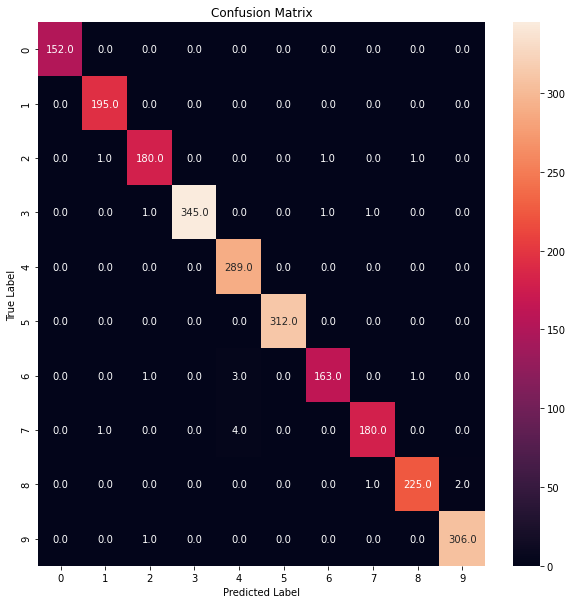

In [10]:
plt_cm(cm)

In [12]:
import pickle
filename = '/run/media/mh1644/My work/machine learning/deep_learning/computer_vision/livenes_detection/data/code/finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
score = loaded_model.score(X_test, y_test)
print(score)

0.9915504858470638


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       0.99      1.00      0.99       195
           2       0.98      0.98      0.98       183
           3       1.00      0.99      1.00       348
           4       0.98      1.00      0.99       289
           5       1.00      1.00      1.00       312
           6       0.99      0.97      0.98       168
           7       0.99      0.97      0.98       185
           8       0.99      0.99      0.99       228
           9       0.99      1.00      1.00       307

    accuracy                           0.99      2367
   macro avg       0.99      0.99      0.99      2367
weighted avg       0.99      0.99      0.99      2367

